# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: AYOOLA MARGARET

<br>

## Please show and display ALL your calculations and results.


In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union
import warnings
warnings.filterwarnings('ignore')

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

In [2]:
#loading dataset
df = pd.read_csv("Ulta Skincare Reviews.csv.zip")

print(df.shape)

df.head(50)

(4150, 10)


Review_Title  \
0                                  Perfect   
1                            You need this   
2                               Clean skin   
3                         Love This Stuff!   
4          This exfoliates very nicely and   
5                    Seriously nice scrub!   
6                          Absolutely love   
7            I truly like the multivitamin   
8                                 Favorite   
9                                 Excelent   
10          Love this product to exfoliate   
11               Helped my dry winter face   
12           Favorite Dermalogica product!   
13       Great product. Always feel gently   
14                          Best exfoliant   
15                Best Thermafoliant Scrub   
16                       Recommendâ€¦.yes!   
17              Multivitamin thermafoliant   
18                           Great product   
19                  My Favorite Exfoliant!   
20                              Love this!   
21                                Love it!   
22                                 Amazing   
23                 Feels warm when it goes   
24                       Thermfoliant love   
25                        My new baby skin   
26           Love this product! I couldn't   
27                        Polish your skin   
28         Love the warming sensation when   
29        Really great exfoliator! My skin   
30  Best stuff ever and it smells good too   
31                           Favorite item   
32                  Noticeable difference.   
33               Only been using for three   
34              My skin has improved since   
35                                 Love it   
36              My favorite product in the   
37                I love this product! The   
38                   I do really like this   
39          Love the warming sensation and   
40                         To me this is a   
41                Best exfoliant I used as   
42           I love how this Thermafoliant   
43                                LOVE IT!   
44                     A lovely product !!   
45                    I use it three times   
46                            nice product   
47                             Great scrub   
48                  Feels nice on the skin   
49                       Excellent product   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review_Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                               Love using this on my face while in the shower. Heats up and gives a light scrub nicely   
1                                                                                                                                                                                                                                                                                                                                                                                                                    Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother   
2                                                                                                                                                                                                                 

In [3]:
df.shape

(4150, 10)

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


**understanding the dataset**

In [4]:
df.columns

Index(['Review_Title', 'Review_Text', 'Verified_Buyer', 'Review_Date',
       'Review_Location', 'Review_Upvotes', 'Review_Downvotes', 'Product',
       'Brand', 'Scrape_Date'],
      dtype='object')

In [5]:
#checking for the type of data 
df.dtypes

Review_Title        object
Review_Text         object
Verified_Buyer      object
Review_Date         object
Review_Location     object
Review_Upvotes       int64
Review_Downvotes     int64
Product             object
Brand               object
Scrape_Date         object
dtype: object

In [6]:
#checking for the  number of each unique features
df.nunique()

Review_Title        2828
Review_Text         3661
Verified_Buyer         2
Review_Date           41
Review_Location     1423
Review_Upvotes        23
Review_Downvotes      15
Product                4
Brand                  1
Scrape_Date            1
dtype: int64

checking the dataset, it is noticed that the scrape_date is an object instead of date time format, hence it would be cleaned to be converted to date_time format.

In [7]:
df['Scrape_Date'] = pd.to_datetime(df['Scrape_Date'])
df.dtypes

Review_Title                object
Review_Text                 object
Verified_Buyer              object
Review_Date                 object
Review_Location             object
Review_Upvotes               int64
Review_Downvotes             int64
Product                     object
Brand                       object
Scrape_Date         datetime64[ns]
dtype: object

**Exploratory Data Analysis** 

In [8]:
#checking if any of our data is duplicated in the dataset
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4145    False
4146    False
4147    False
4148    False
4149    False
Length: 4150, dtype: bool

In [9]:
df.loc[df.duplicated()]

Review_Title  \
710                                                        Buy it!   
711                                                Amazing product   
712                                Would absolutely buy this again   
713                                                 It's hydrating   
714                                                 Love this mask   
715                                                        Buy it!   
716                                                Amazing product   
717                                Would absolutely buy this again   
718                                                 It's hydrating   
719                                                 Love this mask   
720                                                        Buy it!   
721                                                Amazing product   
722                                Would absolutely buy this again   
723                                                 It's hydrating   
724                                                 Love this mask   
725                                                        Buy it!   
726                                                Amazing product   
727                                Would absolutely buy this again   
728                                                 It's hydrating   
729                                                 Love this mask   
730                                                        Buy it!   
731                                                Amazing product   
732                                Would absolutely buy this again   
733                                                 It's hydrating   
734                                                 Love this mask   
735                                                        Buy it!   
736                                                Amazing product   
737                                Would absolutely buy this again   
738                                                 It's hydrating   
739                                                 Love this mask   
740                                                        Buy it!   
741                                                Amazing product   
742                                Would absolutely buy this again   
743                                                 It's hydrating   
744                                                 Love this mask   
745                                                        Buy it!   
746                                                Amazing product   
747                                Would absolutely buy this again   
748                                                 It's hydrating   
749                                                 Love this mask   
750                                                        Buy it!   
751                                                Amazing product   
752                                Would absolutely buy this again   
753                                                 It's hydrating   
754                                                 Love this mask   
755                                                        Buy it!   
756                                                Amazing product   
757                                Would absolutely buy this again   
758                                                 It's hydrating   
759                                                 Love this mask   
760                                                        Buy it!   
761                                                Amazing product   
762                                Would absolutely buy this again   
763                                                 It's hydrating   
764                                                 Love this mask   
765                                                        Buy it!   
766                                                Amazing produ

In [10]:
df.loc[df.duplicated()].shape

(456, 10)

In [11]:
#checking for the duplicates in the Review_Title for complete similiarity
df.query('Review_Title == "Would absolutely buy this again"')

Review_Title  \
707   Would absolutely buy this again   
712   Would absolutely buy this again   
717   Would absolutely buy this again   
722   Would absolutely buy this again   
727   Would absolutely buy this again   
732   Would absolutely buy this again   
737   Would absolutely buy this again   
742   Would absolutely buy this again   
747   Would absolutely buy this again   
752   Would absolutely buy this again   
757   Would absolutely buy this again   
762   Would absolutely buy this again   
767   Would absolutely buy this again   
772   Would absolutely buy this again   
777   Would absolutely buy this again   
782   Would absolutely buy this again   
787   Would absolutely buy this again   
792   Would absolutely buy this again   
797   Would absolutely buy this again   
802   Would absolutely buy this again   
807   Would absolutely buy this again   
812   Would absolutely buy this again   
817   Would absolutely buy this again   
822   Would absolutely buy this again   
827   Would absolutely buy this again   
832   Would absolutely buy this again   
837   Would absolutely buy this again   
842   Would absolutely buy this again   
847   Would absolutely buy this again   
852   Would absolutely buy this again   
857   Would absolutely buy this again   
862   Would absolutely buy this again   
867   Would absolutely buy this again   
872   Would absolutely buy this again   
877   Would absolutely buy this again   
882   Would absolutely buy this again   
887   Would absolutely buy this again   
892   Would absolutely buy this again   
897   Would absolutely buy this again   
902   Would absolutely buy this again   
907   Would absolutely buy this again   
912   Would absolutely buy this again   
917   Would absolutely buy this again   
922   Would absolutely buy this again   
927   Would absolutely buy this again   
932   Would absolutely buy this again   
937   Would absolutely buy this again   
942   Would absolutely buy this again   
947   Would absolutely buy this again   
952   Would absolutely buy this again   
957   Would absolutely buy this again   
962   Would absolutely buy this again   
967   Would absolutely buy this again   
972   Would absolutely buy this again   
977   Would absolutely buy this again   
982   Would absolutely buy this again   
987   Would absolutely buy this again   
992   Would absolutely buy this again   
997   Would absolutely buy this again   
1002  Would absolutely buy this again   
1007  Would absolutely buy this again   
1012  Would absolutely buy this again   
1017  Would absolutely buy this again   
1022  Would absolutely buy this again   
1027  Would absolutely buy this again   
1032  Would absolutely buy this again   
1037  Would absolutely buy this again   
1042  Would absolutely buy this again   
1047  Would absolutely buy this again   
1052  Would absolutely buy this again   
1057  Would absolutely buy this again   
1062  Would absolutely buy this again   
1067  Would absolutely buy this again   
1072  Would absolutely buy this again   
1077  Would absolutely buy this again   
1082  Would absolutely buy this again   
1087  Would absolutely buy this again   
1092  Would absolutely buy this again   
1097  Would absolutely buy this again   
1102  Would absolutely buy this again   
1107  Would absolutely buy this again   
1112  Would absolutely buy this again   
1117  Would absolutely buy this again   
1122  Would absolutely buy this again   
1127  Would absolutely buy this again   
1132  Would absolutely buy this again   
1137  Would absolutely buy this again   
1142  Would absolutely buy this again   
1147  Would absolutely buy this again   

                                                                                                                                                                                                                                                                                                                                    Review_Tex

In [12]:
#checking for the dataset without duplicates, renaming it and resetting index
df_1 = df.loc[~df.duplicated()].reset_index(drop=True).copy()

inference: from the code above,it is noted that we have 456 duplicted data rows in our dataset, the data set was cleaned to remove duplicates. firstly, the review title was checked in order to cross check if the duplicates were complete duplicates across all columns or just across some columns.its was noticed that they were complete duplicates across all columns, hence the duplicates were dropped and a new dataframe containing datasets without duplicates was created.


In [13]:
df_1

Review_Title  \
0                                               Perfect   
1                                         You need this   
2                                            Clean skin   
3                                      Love This Stuff!   
4                       This exfoliates very nicely and   
...                                                 ...   
3689                     I would buy this product again   
3690        Gentle exfoliant- leaves skin smooth & soft   
3691  One of my favorite skincare products of all time.   
3692                                            Ehhh...   
3693                                This is the best!!!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Review_Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Love using this on my face while in the shower. Heats up and gives a light scrub nicely   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Enjoy this product so much ! I look forward to using it - really feels great.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [14]:
#checking for the shape of the new dataset
df_1.shape

(3694, 10)

## FEATURES UNDERSTANDING

In [15]:
# Split the data into numeric and categorical data
num_data = df_1.select_dtypes(include=[int, float])
cat_data = df_1.select_dtypes(exclude=[int, float])

# Check the shape of the data
num_data.shape, cat_data.shape

((3694, 2), (3694, 8))

In [16]:
num_data.head()

Review_Upvotes  Review_Downvotes
0               0                 0
1               0                 0
2               0                 0
3               0                 0
4               0                 0

In [17]:
df_1['Review_Upvotes'].value_counts()

0     2694
1      540
2      219
3       89
4       48
5       29
7       16
6       11
9        9
12       6
8        5
14       5
10       5
11       4
13       4
25       2
15       2
20       1
17       1
16       1
19       1
47       1
84       1
Name: Review_Upvotes, dtype: int64

In [18]:
df_1['Review_Upvotes'].value_counts().reset_index(drop=True).copy()

0     2694
1      540
2      219
3       89
4       48
5       29
6       16
7       11
8        9
9        6
10       5
11       5
12       5
13       4
14       4
15       2
16       2
17       1
18       1
19       1
20       1
21       1
22       1
Name: Review_Upvotes, dtype: int64

Text(0, 0.5, 'count')

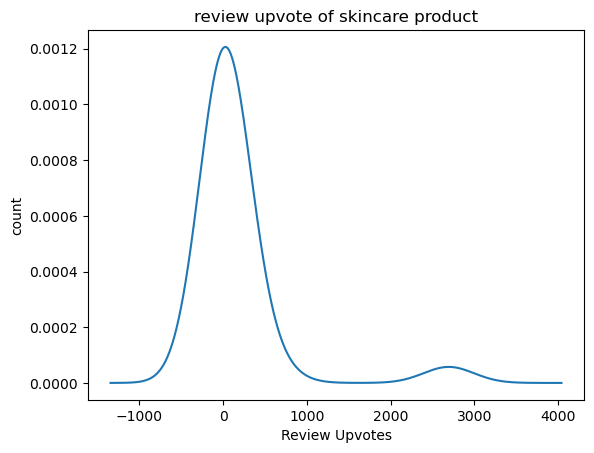

In [19]:
ax= df_1['Review_Upvotes'].value_counts().plot(kind = 'kde', title = 'review upvote of skincare product')
ax.set_xlabel('Review Upvotes')
ax.set_ylabel('count')

In [20]:
df_1['Review_Downvotes'].value_counts()

0     3331
1      261
2       53
3       19
4        7
7        6
9        6
5        3
6        2
11       1
8        1
13       1
14       1
35       1
10       1
Name: Review_Downvotes, dtype: int64

In [21]:
df_1['Review_Downvotes'].value_counts().reset_index(drop=True).copy()

0     3331
1      261
2       53
3       19
4        7
5        6
6        6
7        3
8        2
9        1
10       1
11       1
12       1
13       1
14       1
Name: Review_Downvotes, dtype: int64

Text(0, 0.5, 'count')

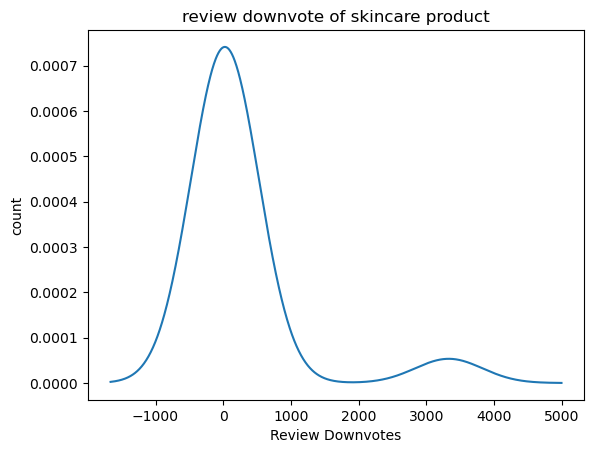

In [22]:
bx= df_1['Review_Downvotes'].value_counts().plot(kind = 'kde', title = 'review downvote of skincare product')
bx.set_xlabel('Review Downvotes')
bx.set_ylabel('count')

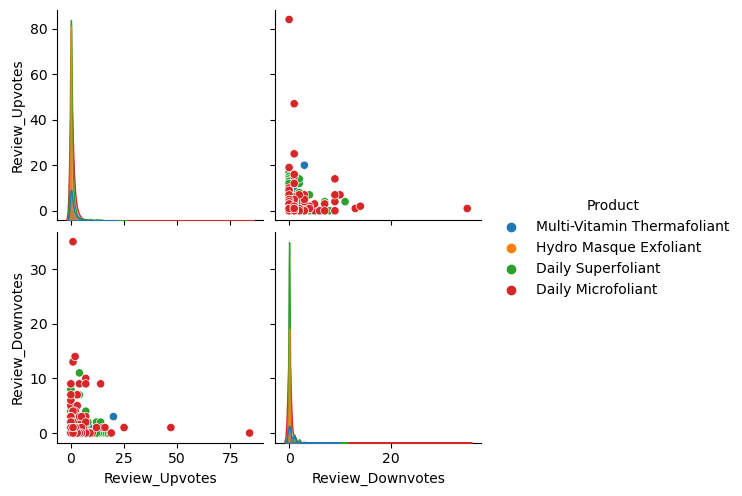

In [23]:
sns.pairplot(
    df_1,
    hue="Product",
)
plt.show()

In [24]:
#checking the statistical values of the numerical data of the dataset
df.describe()

Review_Upvotes  Review_Downvotes
count     4150.000000       4150.000000
mean         0.591325          0.161205
std          2.210041          0.912561
min          0.000000          0.000000
25%          0.000000          0.000000
50%          0.000000          0.000000
75%          0.000000          0.000000
max         84.000000         35.000000

In [25]:
#catgorical variables
cat_data.head()

Review_Title  \
0                          Perfect   
1                    You need this   
2                       Clean skin   
3                 Love This Stuff!   
4  This exfoliates very nicely and   

                                                                                                                                                                                                                                  Review_Text  \
0                                                                                                                                                     Love using this on my face while in the shower. Heats up and gives a light scrub nicely   
1                                                                                                                                                          Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother   
2                                                                                                                                                               Enjoy this product so much ! I look forward to using it - really feels great.   
3  I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.   
4                                                                               This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.   

  Verified_Buyer   Review_Date Review_Location                      Product  \
0             No   15 days ago     Undisclosed  Multi-Vitamin Thermafoliant   
1             No   27 days ago     Undisclosed  Multi-Vitamin Thermafoliant   
2             No  2 months ago     Undisclosed  Multi-Vitamin Thermafoliant   
3             No  2 months ago     Undisclosed  Multi-Vitamin Thermafoliant   
4             No  2 months ago     Undisclosed  Multi-Vitamin Thermafoliant   

         Brand Scrape_Date  
0  Dermalogica  2023-03-27  
1  Dermalogica  2023-03-27  
2  Dermalogica  2023-03-27  
3  Dermalogica  2023-03-27  
4  Dermalogica  2023-03-27

In [26]:
#checking for unique labels of each categorical columns
for col in cat_data:
    print(col, ': ', len(cat_data[col].unique()), 'labels')

Review_Title :  2828 labels
Review_Text :  3662 labels
Verified_Buyer :  2 labels
Review_Date :  41 labels
Review_Location :  1424 labels
Product :  4 labels
Brand :  1 labels
Scrape_Date :  1 labels


In [27]:
df_1.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [28]:
# checking for the Percentage of missing values in Review_Text
(cat_data["Review_Text"].isna().sum() / cat_data.shape[0]) * 100

0.05414185165132648

In [29]:
cat_data["Review_Location"].describe()

count            3693
unique           1423
top       Undisclosed
freq              908
Name: Review_Location, dtype: object

In [30]:
# checking for the Percentage of missing values of Review_Location
(cat_data["Review_Location"].isna().sum() / cat_data.shape[0]) * 100

0.02707092582566324

In [31]:
#filling the missing values with 0.
df_1.replace(np.nan, "0", inplace = True)

In [32]:
df_1.isnull().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [33]:
#checking the value count of the product
df_1['Product'].value_counts()

Daily Superfoliant             1495
Daily Microfoliant             1489
Hydro Masque Exfoliant          360
Multi-Vitamin Thermafoliant     350
Name: Product, dtype: int64

In [34]:
df_1['Product'].info

<bound method Series.info of 0       Multi-Vitamin Thermafoliant
1       Multi-Vitamin Thermafoliant
2       Multi-Vitamin Thermafoliant
3       Multi-Vitamin Thermafoliant
4       Multi-Vitamin Thermafoliant
                   ...             
3689             Daily Microfoliant
3690             Daily Microfoliant
3691             Daily Microfoliant
3692             Daily Microfoliant
3693             Daily Microfoliant
Name: Product, Length: 3694, dtype: object>

In [35]:
df_1['Review_Location'].value_counts()

Undisclosed          908
London                71
Florida               45
California            43
New York              41
                    ... 
Brooklyn New York      1
Fort Lauderdale        1
SO UT                  1
Pittsburgh , PA        1
Fayetteville           1
Name: Review_Location, Length: 1424, dtype: int64

In [36]:
df_1['Review_Location'].nunique

<bound method IndexOpsMixin.nunique of 0            Undisclosed
1            Undisclosed
2            Undisclosed
3            Undisclosed
4            Undisclosed
              ...       
3689    vernon hills, il
3690        Humboldt, CA
3691     Albuquerque, NM
3692        Fayetteville
3693         Mississippi
Name: Review_Location, Length: 3694, dtype: object>

In [37]:
df_1['Review_Date'].value_counts()

1 year ago       841
5 years ago      631
2 years ago      475
4 years ago      412
3 years ago      279
5 months ago     234
6 years ago      197
7 years ago       94
6 months ago      62
9 months ago      55
3 months ago      46
4 months ago      46
2 months ago      43
7 months ago      42
11 months ago     42
10 months ago     41
8 months ago      40
9 years ago       24
1 month ago       23
11 years ago      16
8 years ago       11
10 years ago      11
23 days ago        3
16 days ago        3
17 days ago        3
29 days ago        2
25 days ago        2
15 days ago        2
18 days ago        2
19 days ago        1
20 days ago        1
22 days ago        1
7 days ago         1
28 days ago        1
27 days ago        1
4 days ago         1
5 days ago         1
12 days ago        1
14 days ago        1
21 days ago        1
24 days ago        1
Name: Review_Date, dtype: int64

In [38]:
df_1['Review_Text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Love using this on my face while in the shower. Heats up and gives a light scrub nicely
1                                                                                                                                                                                                                                                                                       

In [39]:
cat_data.describe()

Review_Title    Review_Text Verified_Buyer Review_Date Review_Location  \
count          3694           3692           3694        3694            3693   
unique         2828           3661              2          41            1423   
top         Love it  Great product             No  1 year ago     Undisclosed   
freq             54              6           2453         841             908   
first           NaN            NaN            NaN         NaN             NaN   
last            NaN            NaN            NaN         NaN             NaN   

                   Product        Brand          Scrape_Date  
count                 3694         3694                 3694  
unique                   4            1                    1  
top     Daily Superfoliant  Dermalogica  2023-03-27 00:00:00  
freq                  1495         3694                 3694  
first                  NaN          NaN  2023-03-27 00:00:00  
last                   NaN          NaN  2023-03-27 00:00:00

## inference:
from the findings above, review upvote with a mean of 0.59 is higher than the review downvotes, with their max bein 84 and 35 respectively, it can be inferred that the the products generally has higher positive review when compared with the negative reviews. it is also noted that review upvotes count is 22 while veiew downvotes count was 14. it was noticed that the review text 0 with the hihgest review (Love using this on my face while in the shower. Heats up and gives a light scrub nicely) had more downvotes review than upward votes reviews. it is also noticed that the highest location with reviews is the **undisclosed** location with London coming second. 
looking closely at the duplicates, this could infer that either the buyers had the same skin condition, got the result needed after using the product, hence feels the same way about the product reason being that the duplicates that exist are 456 which i wouldn't want to attribute to be mere coincidences. it is noticed that the product most purchase is the daily superfoliant, which is mostly used for skin exfoliation, hence it can be deduced that the product helped in skin exfoliation.

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [40]:
#Creating a dataframe using regex

df_1['review'] = df_1['Review_Text'].apply(lambda x: re.search('[A-Z][^\\.;]*(Face|FACE|face|SKIN|Skin|skin|product|Product|PRODUCT|love|LOVE|Love)[^\\.;]*', x))

#fetching the text that matches the regex and storing it in a new column called review_text
df_1['review_text'] = df_1['review'].apply(lambda x: x.group(0) if x else None)

#diplaying the the new created column
print(df_1['review_text'])

0                                                                                                                            Love using this on my face while in the shower
1                                                                                                                                               My skin is SO MUCH smoother
2                                                                                              Enjoy this product so much ! I look forward to using it - really feels great
3                                                                                                                  I've never tried anything like this before and I love it
4                                                            This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin 
                                                                                       ...                                                  

In [41]:
df_1['review_text']

0                                                                                                                            Love using this on my face while in the shower
1                                                                                                                                               My skin is SO MUCH smoother
2                                                                                              Enjoy this product so much ! I look forward to using it - really feels great
3                                                                                                                  I've never tried anything like this before and I love it
4                                                            This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin 
                                                                                       ...                                                  

In [42]:
#checking the dataframe
df_1.head()

Review_Title  \
0                          Perfect   
1                    You need this   
2                       Clean skin   
3                 Love This Stuff!   
4  This exfoliates very nicely and   

                                                                                                                                                                                                                                  Review_Text  \
0                                                                                                                                                     Love using this on my face while in the shower. Heats up and gives a light scrub nicely   
1                                                                                                                                                          Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother   
2                                                                                                                                                               Enjoy this product so much ! I look forward to using it - really feels great.   
3  I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.   
4                                                                               This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.   

  Verified_Buyer   Review_Date Review_Location  Review_Upvotes  \
0             No   15 days ago     Undisclosed               0   
1             No   27 days ago     Undisclosed               0   
2             No  2 months ago     Undisclosed               0   
3             No  2 months ago     Undisclosed               0   
4             No  2 months ago     Undisclosed               0   

   Review_Downvotes                      Product        Brand Scrape_Date  \
0                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27   
1                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27   
2                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27   
3                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27   
4                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27   

                                                                                       review  \
0     <re.Match object; span=(0, 46), match='Love using this on my face while in the shower'>   
1                       <re.Match object; span=(55, 82), match='My skin is SO MUCH smoother'>   
2   <re.Match object; span=(0, 76), match='Enjoy this product so much ! I look forward to us>   
3   <re.Match object; span=(0, 56), match="I've never tried anything like this before and I >   
4  <re.Match object; span=(0, 110), match='This exfoliates very nicely and gives a very smoo>   

                                                                                                      review_text  
0                                                                  Love using this on my face while in the shower  
1                                                                                     My skin is SO MUCH smoother  
2                                    Enjoy this product so much ! I look forward to using it - really feels great  
3                                                        I've never tried anything like this before and I love it  
4  This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin

In [43]:
df_1['review_text'].isna().sum()

448

In [44]:
#importing required libraries
from wordcloud import WordCloud, STOPWORDS
import sys, os


In [45]:
help(WordCloud)

Help on class WordCloud in module wordcloud.wordcloud:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defaul

In [46]:
#checking stopwords
stopwords = STOPWORDS
print(stopwords)
print(len(stopwords))

{"she'd", 'has', 'such', "they're", 'herself', "we've", 'but', 'against', 'of', 'ever', 'there', 'r', 'be', 'both', "where's", 'me', 'themselves', 'am', 'also', 'been', 'hers', 'by', 'they', 'we', 'same', 'do', 'being', 'if', 'hence', 'myself', 'since', 'when', "doesn't", 'while', 'so', "aren't", 'over', 'can', 'i', 'no', 'were', 'further', "hasn't", 'then', 'with', 'few', 'its', 'get', 'his', "who's", "you'd", "wouldn't", 'above', 'for', 'otherwise', 'yourself', "we're", 'did', 'himself', 'having', "weren't", 'ourselves', 'some', 'which', 'only', "haven't", 'would', "you'll", 'like', 'nor', "when's", "they'll", "he's", 'just', 'your', "isn't", "can't", 'very', 'a', 'where', "that's", 'that', 'again', "i'll", 'have', 'what', 'it', 'how', 'doing', "there's", 'other', 'out', 'cannot', "why's", 'before', "we'd", 'to', 'however', 'and', 'therefore', 'those', 'he', 'k', 'ours', 'into', 'once', 'com', 'whom', 'why', 'through', 'an', 'him', 'off', 'she', "here's", 'shall', "didn't", 'from', '

In [47]:
data = df_1["review_text"]
data

0                                                                                                                            Love using this on my face while in the shower
1                                                                                                                                               My skin is SO MUCH smoother
2                                                                                              Enjoy this product so much ! I look forward to using it - really feels great
3                                                                                                                  I've never tried anything like this before and I love it
4                                                            This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin 
                                                                                       ...                                                  

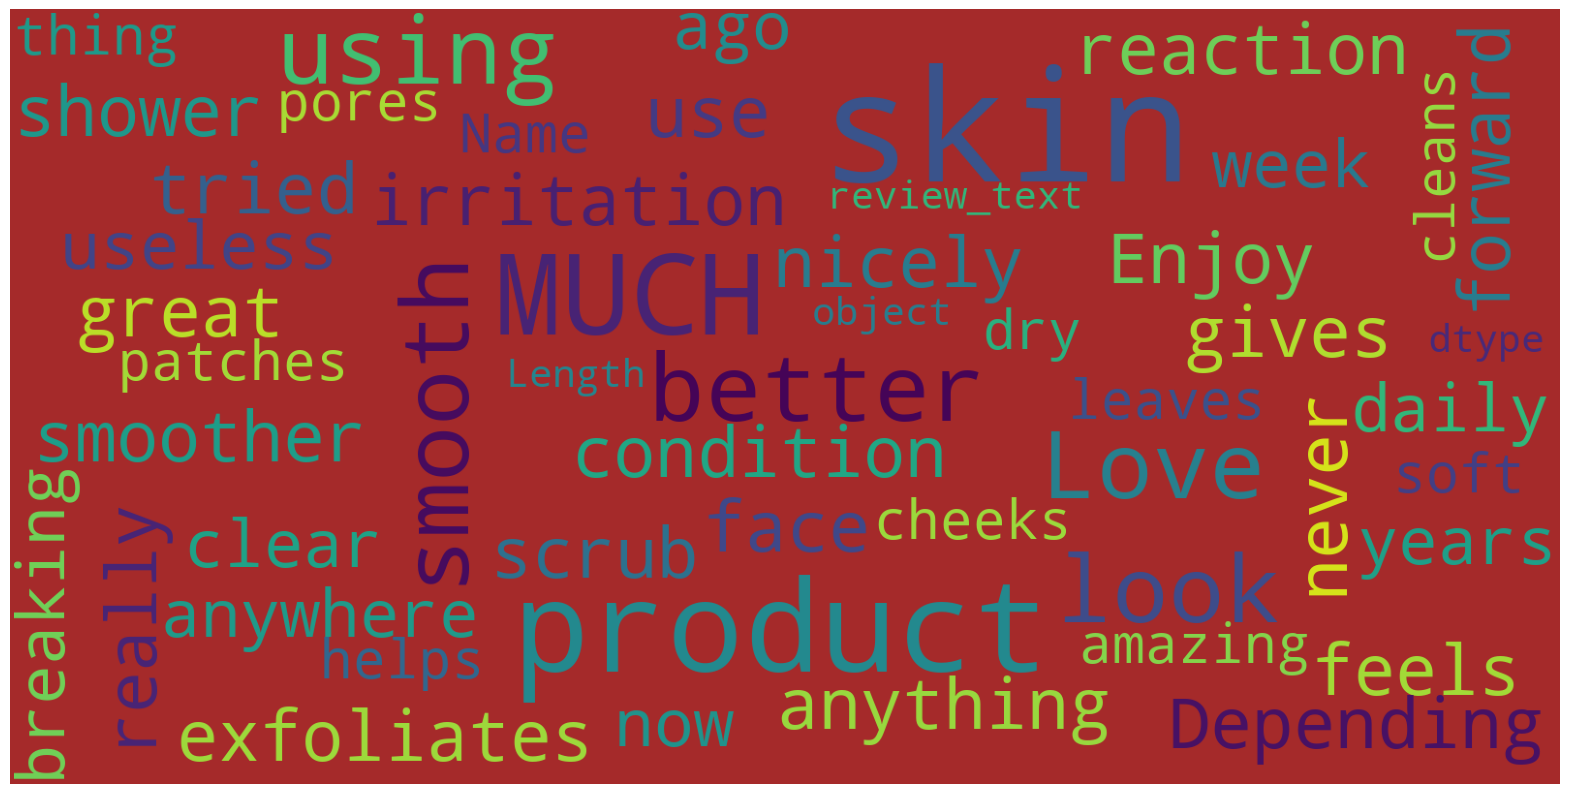

In [48]:
#creating a wordcloud 
def mywordcloud (data, title =None):
    wordcloud = WordCloud(
    background_color ='brown',
    stopwords=stopwords,
    max_words=400,
    max_font_size=40,
    scale=4,
    random_state= 1
    ).generate(str(data))
    
    fig= plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top =2.3)
#displaying the wordcloud        
    plt.imshow(wordcloud)
    plt.show()
    
mywordcloud( df_1["review_text"].dropna())

In [49]:
text = " ".join(cat for cat in df_1.Review_Text)
text

'Love using this on my face while in the shower. Heats up and gives a light scrub nicely Even better than the daily microfoliant. I\'m obsessed. My skin is SO MUCH smoother Enjoy this product so much ! I look forward to using it - really feels great. I\'ve never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I\'ve encountered have been positive ones. This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again. Love that you can use it wet and dry, you can control how abrasive it is. Leaves your face soft and drenched in vitamins. Absolutely love I truly like the multivitamin thermafoliant product, which I have been using for the last 7 years. I\'m very happy to purchase directly since it\'s no longer available from the Ulta store. Definitely love it! My skin

In [50]:
#converting every word in text to lower case
lower_case_text=text.lower()
lower_case_text


'love using this on my face while in the shower. heats up and gives a light scrub nicely even better than the daily microfoliant. i\'m obsessed. my skin is so much smoother enjoy this product so much ! i look forward to using it - really feels great. i\'ve never tried anything like this before and i love it. when you apply it to your face you get a little shot of warm that feels so good. the scrub seems very gritty but the only side effects i\'ve encountered have been positive ones. this exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . i highly recommended it, i will buy it again. love that you can use it wet and dry, you can control how abrasive it is. leaves your face soft and drenched in vitamins. absolutely love i truly like the multivitamin thermafoliant product, which i have been using for the last 7 years. i\'m very happy to purchase directly since it\'s no longer available from the ulta store. definitely love it! my skin

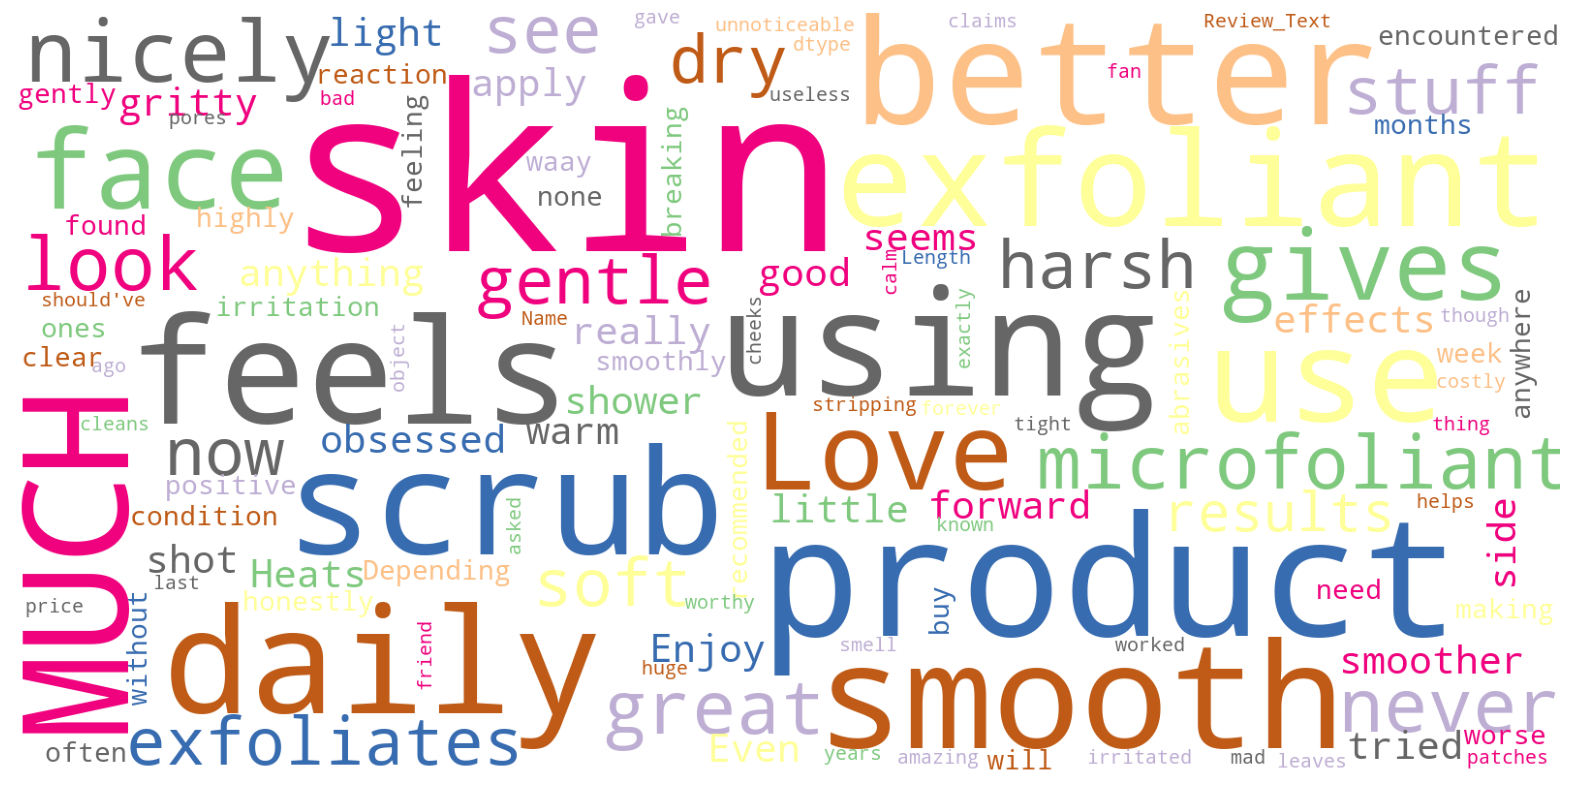

In [51]:
#generating the wordcloud
def mywordcloud (lower_case_text, title =None):
    wordcloud = WordCloud(
    background_color ='white',
    colormap = 'Accent_r',
    stopwords=stopwords,
    max_words= 450,
    max_font_size=60,
    scale=4,
    random_state= 1
    ).generate(str(lower_case_text))
    
    fig= plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top =2.3)
#displaying the wordcloud        
    plt.imshow(wordcloud)
    plt.show()
    
mywordcloud( df_1["Review_Text"].dropna())

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [62]:
#importing the natural language tool kits
#import nltk
#print('successfully imported')

successfully imported


**cleaning the review text in other to use it for NLP**

In [52]:
lower_case_text

'love using this on my face while in the shower. heats up and gives a light scrub nicely even better than the daily microfoliant. i\'m obsessed. my skin is so much smoother enjoy this product so much ! i look forward to using it - really feels great. i\'ve never tried anything like this before and i love it. when you apply it to your face you get a little shot of warm that feels so good. the scrub seems very gritty but the only side effects i\'ve encountered have been positive ones. this exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . i highly recommended it, i will buy it again. love that you can use it wet and dry, you can control how abrasive it is. leaves your face soft and drenched in vitamins. absolutely love i truly like the multivitamin thermafoliant product, which i have been using for the last 7 years. i\'m very happy to purchase directly since it\'s no longer available from the ulta store. definitely love it! my skin

In [53]:
#removing all punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
cleaned_text= lower_case_text.translate(str.maketrans("","",string.punctuation))
cleaned_text

'love using this on my face while in the shower heats up and gives a light scrub nicely even better than the daily microfoliant im obsessed my skin is so much smoother enjoy this product so much  i look forward to using it  really feels great ive never tried anything like this before and i love it when you apply it to your face you get a little shot of warm that feels so good the scrub seems very gritty but the only side effects ive encountered have been positive ones this exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin  i highly recommended it i will buy it again love that you can use it wet and dry you can control how abrasive it is leaves your face soft and drenched in vitamins absolutely love i truly like the multivitamin thermafoliant product which i have been using for the last 7 years im very happy to purchase directly since its no longer available from the ulta store definitely love it my skin face feels better after usin

In [55]:
#tokenizing the wors in order to split them individually.
tokenized_words= cleaned_text.split()
tokenized_words

['love',
 'using',
 'this',
 'on',
 'my',
 'face',
 'while',
 'in',
 'the',
 'shower',
 'heats',
 'up',
 'and',
 'gives',
 'a',
 'light',
 'scrub',
 'nicely',
 'even',
 'better',
 'than',
 'the',
 'daily',
 'microfoliant',
 'im',
 'obsessed',
 'my',
 'skin',
 'is',
 'so',
 'much',
 'smoother',
 'enjoy',
 'this',
 'product',
 'so',
 'much',
 'i',
 'look',
 'forward',
 'to',
 'using',
 'it',
 'really',
 'feels',
 'great',
 'ive',
 'never',
 'tried',
 'anything',
 'like',
 'this',
 'before',
 'and',
 'i',
 'love',
 'it',
 'when',
 'you',
 'apply',
 'it',
 'to',
 'your',
 'face',
 'you',
 'get',
 'a',
 'little',
 'shot',
 'of',
 'warm',
 'that',
 'feels',
 'so',
 'good',
 'the',
 'scrub',
 'seems',
 'very',
 'gritty',
 'but',
 'the',
 'only',
 'side',
 'effects',
 'ive',
 'encountered',
 'have',
 'been',
 'positive',
 'ones',
 'this',
 'exfoliates',
 'very',
 'nicely',
 'and',
 'gives',
 'a',
 'very',
 'smooth',
 'skin',
 'after',
 'with',
 'no',
 'irritation',
 'and',
 'no',
 'reaction',


In [56]:
#removing stopwords from the tokenized words and storing it in the final_words
final_words=[]

for word in tokenized_words:
    if word not in stopwords:
        final_words.append(word)
        
final_words

['love',
 'using',
 'face',
 'shower',
 'heats',
 'gives',
 'light',
 'scrub',
 'nicely',
 'even',
 'better',
 'daily',
 'microfoliant',
 'im',
 'obsessed',
 'skin',
 'much',
 'smoother',
 'enjoy',
 'product',
 'much',
 'look',
 'forward',
 'using',
 'really',
 'feels',
 'great',
 'ive',
 'never',
 'tried',
 'anything',
 'love',
 'apply',
 'face',
 'little',
 'shot',
 'warm',
 'feels',
 'good',
 'scrub',
 'seems',
 'gritty',
 'side',
 'effects',
 'ive',
 'encountered',
 'positive',
 'ones',
 'exfoliates',
 'nicely',
 'gives',
 'smooth',
 'skin',
 'irritation',
 'reaction',
 'skin',
 'highly',
 'recommended',
 'will',
 'buy',
 'love',
 'use',
 'wet',
 'dry',
 'control',
 'abrasive',
 'leaves',
 'face',
 'soft',
 'drenched',
 'vitamins',
 'absolutely',
 'love',
 'truly',
 'multivitamin',
 'thermafoliant',
 'product',
 'using',
 'last',
 '7',
 'years',
 'im',
 'happy',
 'purchase',
 'directly',
 'longer',
 'available',
 'ulta',
 'store',
 'definitely',
 'love',
 'skin',
 'face',
 'feels',

**NLP Emotion Algorithm**

## ROBERTA PRETRAINED MODEL FOR SENTIMENTAL ANALYSIS

In [57]:
#installing necessary packages.
!pip install transformers

In [58]:
!C:\Users\taiwo\anaconda3\python.exe -m pip install --upgrade pip

In [59]:
!pip install tensorflow

In [103]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117
                                              0.0/2.3 GB 126.5 kB/s eta 5:06:18


ERROR: Wheel 'torch' located at C:\Users\taiwo\AppData\Local\Temp\pip-unpack-susndmyd\torch-2.0.0+cu117-cp39-cp39-win_amd64.whl is invalid.


In [99]:
import transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [102]:
MODEL =f"cardiffnlp/twitter-roberta-base-sentiment"
Tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFAutoModelForSequenceClassification".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.


**SENTIMENT ANALYSIS USING VADER MODEL**

In [68]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [69]:
sia

In [73]:
# running the polarity_score on the cleaned text of the review text
sia.polarity_scores(cleaned_text)

{'neg': 0.052, 'neu': 0.699, 'pos': 0.249, 'compound': 1.0}

# inference:
**from the result above, it can be seen that the products generally has a higher positive reveiw with the score of 0.249 while the negative review is lower with the score of 0.052, the neutrual feelings tends to be the highest with a score of 0.699**

In [82]:
#creating a new column in the dataset df_1 called Id with incremental number
df_1.insert(0, 'Id', range(0, 0 + len(df_1)))
df_1

Id                                       Review_Title  \
0        0                                            Perfect   
1        1                                      You need this   
2        2                                         Clean skin   
3        3                                   Love This Stuff!   
4        4                    This exfoliates very nicely and   
...    ...                                                ...   
3689  3689                     I would buy this product again   
3690  3690        Gentle exfoliant- leaves skin smooth & soft   
3691  3691  One of my favorite skincare products of all time.   
3692  3692                                            Ehhh...   
3693  3693                                This is the best!!!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Review_Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Love using this on my face while in the shower. Heats up and gives a light scrub nicely   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Enjoy this product so much ! I look forward to using it - really feels great.   
3                                                                                                                                                                                                                                                                                                                                                      

In [84]:
#running the polarity score on the entire dataset
res = {}
for i, row in tqdm(df_1.iterrows(), total = len(df_1)):
    text= row['Review_Text']
    myid= row['Id']
    res[myid]= sia.polarity_scores(text)
    

  0%|          | 0/3694 [00:00<?, ?it/s]

In [85]:
#desplaying the result of the polarized scores of the entire dataset
res

{0: {'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.7964},
 1: {'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.296},
 2: {'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.8347},
 3: {'neg': 0.031, 'neu': 0.749, 'pos': 0.22, 'compound': 0.8636},
 4: {'neg': 0.227, 'neu': 0.618, 'pos': 0.156, 'compound': -0.343},
 5: {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.6369},
 6: {'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6697},
 7: {'neg': 0.06, 'neu': 0.683, 'pos': 0.257, 'compound': 0.8016},
 8: {'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'compound': 0.8777},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.088, 'neu': 0.79, 'pos': 0.122, 'compound': 0.4389},
 13: {'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'compound': 0.8718},
 14: {'neg': 0.037, 'neu': 0.71, 'pos': 0.252, 'compound': 0.9153},
 15: {'neg':

In [87]:
#displaying the result using a pandas dataframe
pd.DataFrame(res).T

neg    neu    pos  compound
0     0.000  0.679  0.321    0.7964
1     0.102  0.723  0.175    0.2960
2     0.000  0.583  0.417    0.8347
3     0.031  0.749  0.220    0.8636
4     0.227  0.618  0.156   -0.3430
...     ...    ...    ...       ...
3689  0.000  0.580  0.420    0.4404
3690  0.066  0.825  0.110    0.7163
3691  0.000  0.734  0.266    0.4404
3692  0.115  0.783  0.102    0.0518
3693  0.000  0.799  0.201    0.8209

[3694 rows x 4 columns]

In [90]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns ={'index': 'Id'})
vaders = vaders.merge(df_1, how = 'left') 
#sentiment scores and metadata
vaders.head()

Id    neg    neu    pos  compound                     Review_Title  \
0   0  0.000  0.679  0.321    0.7964                          Perfect   
1   1  0.102  0.723  0.175    0.2960                    You need this   
2   2  0.000  0.583  0.417    0.8347                       Clean skin   
3   3  0.031  0.749  0.220    0.8636                 Love This Stuff!   
4   4  0.227  0.618  0.156   -0.3430  This exfoliates very nicely and   

                                                                                                                                                                                                                                  Review_Text  \
0                                                                                                                                                     Love using this on my face while in the shower. Heats up and gives a light scrub nicely   
1                                                                                                                                                          Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother   
2                                                                                                                                                               Enjoy this product so much ! I look forward to using it - really feels great.   
3  I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.   
4                                                                               This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.   

  Verified_Buyer   Review_Date Review_Location  Review_Upvotes  \
0             No   15 days ago     Undisclosed               0   
1             No   27 days ago     Undisclosed               0   
2             No  2 months ago     Undisclosed               0   
3             No  2 months ago     Undisclosed               0   
4             No  2 months ago     Undisclosed               0   

   Review_Downvotes                      Product        Brand Scrape_Date  \
0                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27   
1                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27   
2                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27   
3                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27   
4                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27   

                                                                                       review  \
0     <re.Match object; span=(0, 46), match='Love using this on my face while in the shower'>   
1                       <re.Match object; span=(55, 82), match='My skin is SO MUCH smoother'>   
2   <re.Match object; span=(0, 76), match='Enjoy this product so much ! I look forward to us>   
3   <re.Match object; span=(0, 56), match="I've never tried anything like this before and I >   
4  <re.Match object; span=(0, 110), match='This exfoliates very nicely and gives a very smoo>   

                                                                                                      review_text  
0                                                                  Love using this on my face while in the shower  
1                                                                                     My skin is SO MUCH smoother  
2                                    Enjoy this product so much ! I look forward to using it - really feels great  
3                                                        I've never tried anything like this before and I love it  
4  This exfoliates very nicely and gives a very smooth skin after with no irritation and no re

<function matplotlib.pyplot.show(close=None, block=None)>

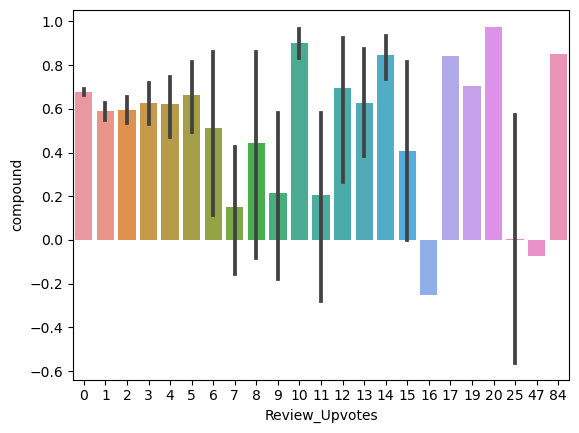

In [91]:
#barplot of the data
sns.barplot(data = vaders, x = 'Review_Upvotes', y = 'compound')
ax.set_title('compound upvote for products')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

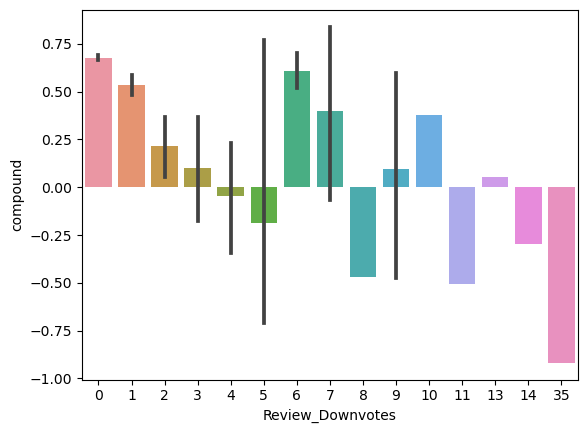

In [92]:
#barplot of the data
sns.barplot(data = vaders, x = 'Review_Downvotes', y = 'compound')
ax.set_title('compound downvote for products')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

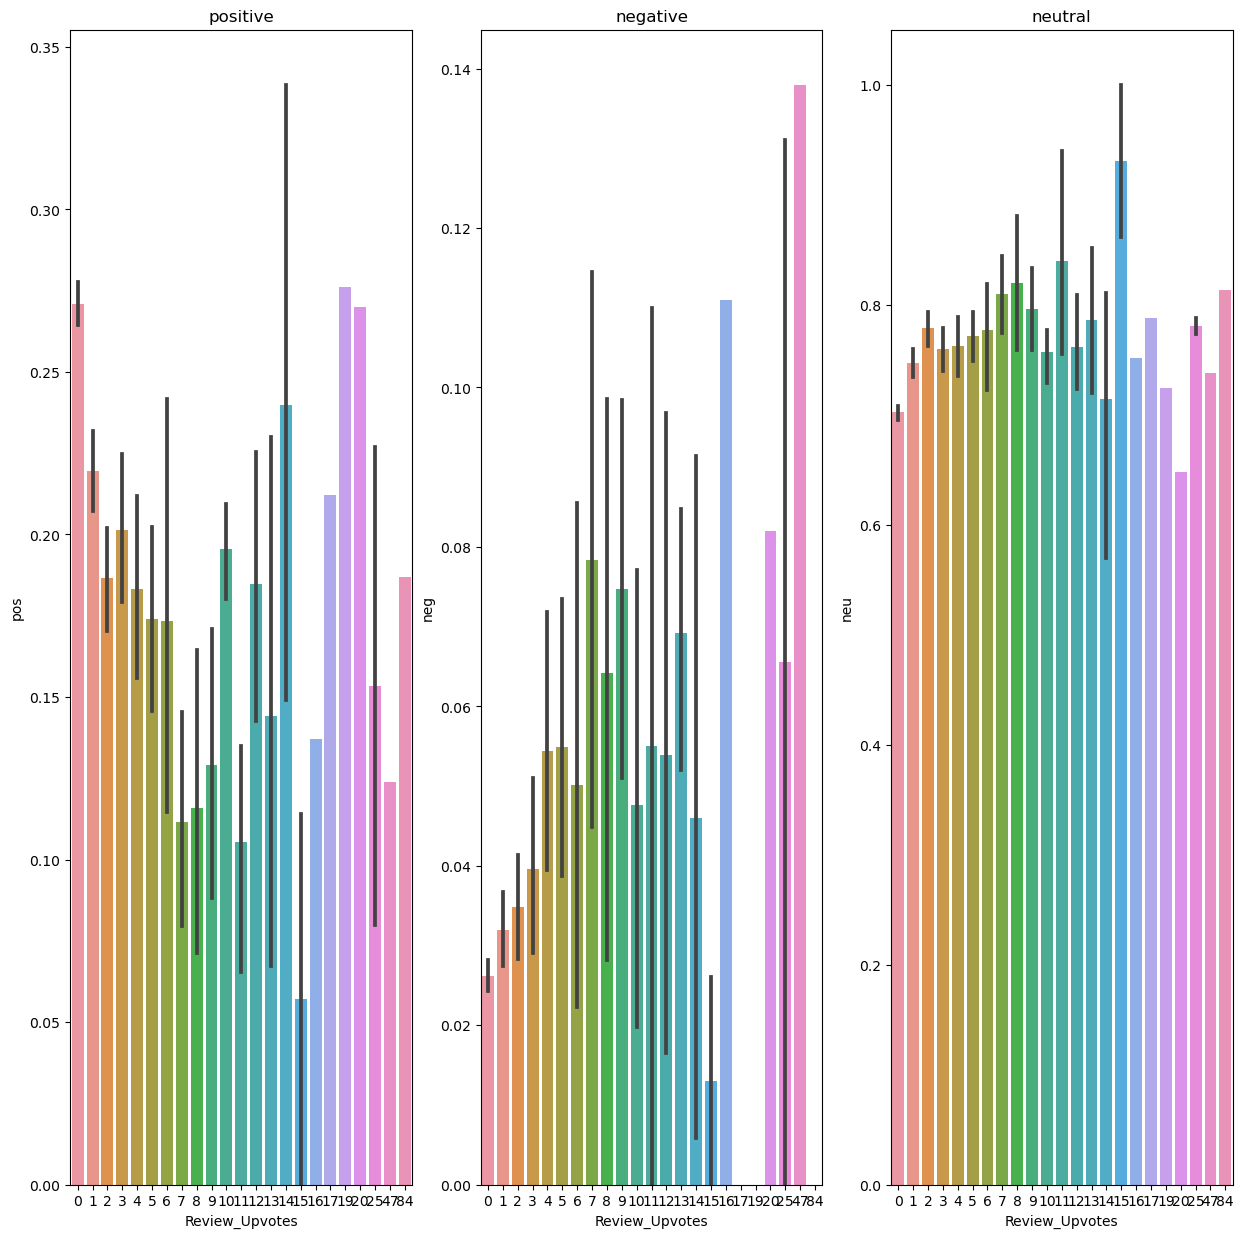

In [95]:
fig, axs= plt.subplots(1, 3, figsize =(15,15))
sns.barplot(data = vaders, x = 'Review_Upvotes', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Review_Upvotes', y = 'neg', ax = axs[1])
sns.barplot(data = vaders, x = 'Review_Upvotes', y = 'neu', ax = axs[2])
axs[0].set_title('positive')
axs[1].set_title('negative')
axs[2].set_title('neutral')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

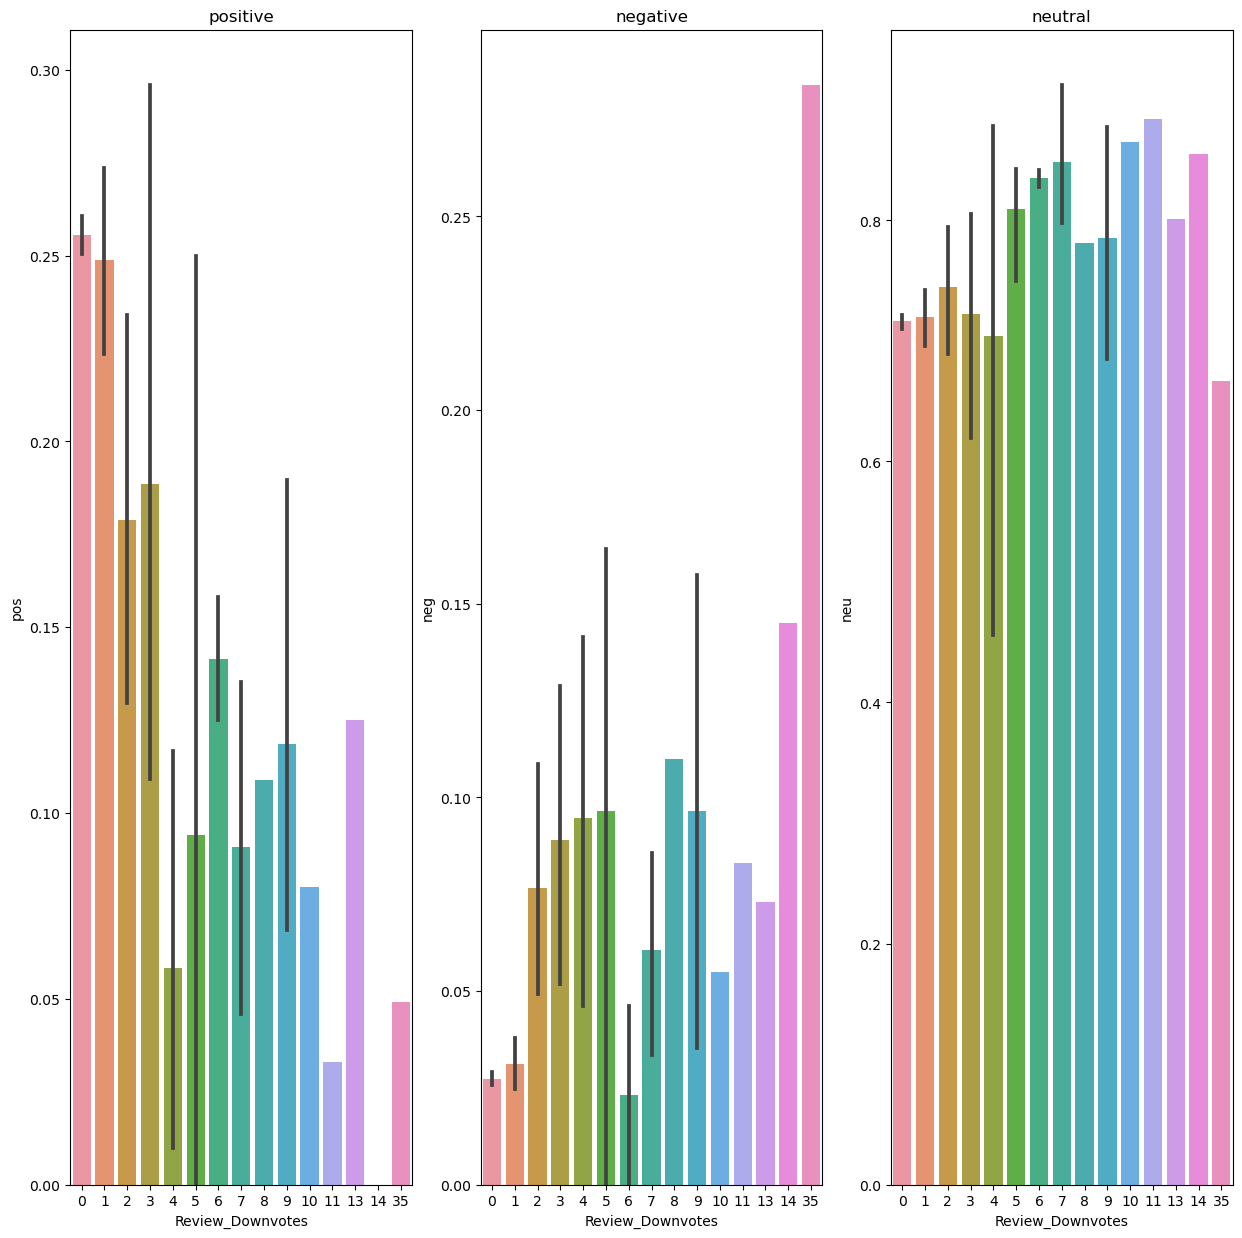

In [96]:
fig, axs= plt.subplots(1, 3, figsize =(15,15))
sns.barplot(data = vaders, x = 'Review_Downvotes', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Review_Downvotes', y = 'neg', ax = axs[1])
sns.barplot(data = vaders, x = 'Review_Downvotes', y = 'neu', ax = axs[2])
axs[0].set_title('positive')
axs[1].set_title('negative')
axs[2].set_title('neutral')
plt.show

In [ ]:
#examining the total numbers of column after one hot encoding
pd.get_dummies(df_1, drop_first = True).shape